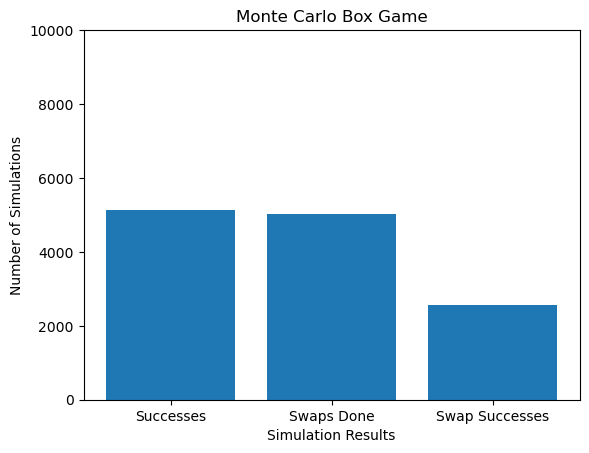

success rate:       0.5127
swaps made:         0.5015
swaps success rate: 0.5124626121635095


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# it doesn't really make sense for the friend to take one of the
# boxes because if he didn't already get the $100 on the first
# try, it'd be guranteed that he'd get it?

num_simulations = 10000
simulations = []
outcomes = []
choices_made = []
swap_result = []

# Box generator
def make_boxes():
    index = np.random.randint(0,2)
    boxes = []
    
    boxes = [10,10,10]
    boxes[index] = 100
    
    return boxes

# Run simulation
for i in range(num_simulations):
    simulations.append(i)
    boxes = make_boxes()
    swap_made = False
    
    # make first choice
    choice = np.random.randint(0,2)
    
    # decide whether to keep the box or not
    # If the number produced is greater than .5, switch, else, keep
    # 1 - swap was made
    # 0 - no swap was done
    keep = random.random()
    if keep > .5:
        new_choice = choice
        while new_choice == choice:
            new_choice = np.random.randint(0,2)
            
        choice = new_choice
        choices_made.append(1)
        swap_made = True
    else:
        choices_made.append(0)
        
    # check if choice gave us $100
    # 1 - success
    # 0 - failure
    if boxes[choice] == 100:
        outcomes.append(1)
        if swap_made:
            swap_result.append(1)
    else:
        outcomes.append(0)
        if swap_made:
            swap_result.append(0)

successes = sum(outcomes)
swaps = sum(choices_made)
swap_successes = sum(swap_result)

x_axis = ['Successes', 'Swaps Done', 'Swap Successes']
y_axis = [successes, swaps, swap_successes]
            
fig = plt.bar(x_axis, y_axis)
plt.title('Monte Carlo Box Game')
plt.xlabel('Simulation Results')
plt.ylabel('Number of Simulations')
plt.ylim(top=num_simulations)
plt.show()
        
print('success rate:       ' + str(successes/num_simulations))
print('swaps made:         ' + str(swaps/num_simulations))
print('swaps success rate: ' + str(swap_successes/swaps))
    
    

2. Use the Monte Carlo method to get the integral for

$$\int_{0}^{1} x \cdot cos(71x) + sin(13x)\,dx$$

In [24]:
# References: https://www.geeksforgeeks.org/monte-carlo-integration-in-python/

from sympy import sin, cos, symbols, integrate
import random
import numpy as np


a = 0
b = 1
N = 1000

array = np.zeros(N)

for i in range(len(array)):
    array[i] = random.uniform(a,b)
    
integral = 0.0

def f(x):
    return x * cos(71*x) + sin(13*x)

for i in array:
    integral += f(i)

answer = (b-a)/float(N)*integral
print('The value calculated by monte carlo integration is {}.'.format(answer))

The value calculated by monte carlo integration is 0.0120782280991253.
